# BASIC DATA CLEANING

In [1]:
# In this section we will study about following things.
#1) identify and remove the columns that have a single value.
#2) identify and remove the columns that have low variance.
#3) identify and remove the rows that contain duplicate value.

# first we have to identify the columns which have single value. 


In [13]:
# by using unique() numpy function


# find the no. of unique values using numpy for each column
from numpy import loadtxt
from numpy import unique 
#dataset
ds=loadtxt('Datasets\oil-spill.csv' , delimiter=',')
# no. of unique values
for i in range(ds.shape[1]):
    print(i, len(unique(ds[:, i])))


0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [10]:
# by using nunique() pandas function.

from pandas import read_csv
ds=read_csv('Datasets\oil-spill.csv', header=None)
print(ds.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


# delete the column which has zero variance.

In [15]:
# delete the column from pandas dataframe by using drop() function.

from pandas import read_csv
df=read_csv('Datasets/oil-spill.csv', header=None)
print(df.shape)
# get the unique value for each column
counts=df.nunique()
# record column to delete
to_del=[i for i,v in enumerate(counts) if v==1]
print(to_del)
#drop useless column
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


# consider the column which has low variance

In [19]:
# find the percentage of unique values of each column using numpy
from numpy import loadtxt
from numpy import unique
ds=loadtxt('Datasets\oil-spill.csv' , delimiter=',')
for i in range(ds.shape[1]):
    num=len(unique(ds[:, i]))
    percentage=float(num)/ds.shape[0] * 100
    print('%d,%d,%.1f%%' % (i,num, percentage))

0,238,25.4%
1,297,31.7%
2,927,98.9%
3,933,99.6%
4,179,19.1%
5,375,40.0%
6,820,87.5%
7,618,66.0%
8,561,59.9%
9,57,6.1%
10,577,61.6%
11,59,6.3%
12,73,7.8%
13,107,11.4%
14,53,5.7%
15,91,9.7%
16,893,95.3%
17,810,86.4%
18,170,18.1%
19,53,5.7%
20,68,7.3%
21,9,1.0%
22,1,0.1%
23,92,9.8%
24,9,1.0%
25,8,0.9%
26,9,1.0%
27,308,32.9%
28,447,47.7%
29,392,41.8%
30,107,11.4%
31,42,4.5%
32,4,0.4%
33,45,4.8%
34,141,15.0%
35,110,11.7%
36,3,0.3%
37,758,80.9%
38,9,1.0%
39,9,1.0%
40,388,41.4%
41,220,23.5%
42,644,68.7%
43,649,69.3%
44,499,53.3%
45,2,0.2%
46,937,100.0%
47,169,18.0%
48,286,30.5%
49,2,0.2%


In [50]:
from numpy import loadtxt
from numpy import unique
ds=loadtxt('Datasets\oil-spill.csv' ,delimiter=',')
for i in range(ds.shape[1]):
    num=len(unique(ds[:, i]))
    per=float(num)/ds.shape[0]*100    
    if per < 1:
         print(i, num,per)

21 9 0.96051227321238
22 1 0.10672358591248667
24 9 0.96051227321238
25 8 0.8537886872998933
26 9 0.96051227321238
32 4 0.42689434364994666
36 3 0.32017075773745995
38 9 0.96051227321238
39 9 0.96051227321238
45 2 0.21344717182497333
49 2 0.21344717182497333


# delete the row which has low variance

In [52]:
# delete the rows which has less than 1 percent variance.

from pandas import read_csv
ds=read_csv('Datasets\oil-spill.csv' , header=None)
print(ds.shape)
counts=ds.nunique()
to_del=[i for i,v in enumerate(counts) if (float(v)/ds.shape[0]*100)<1]
print(to_del)
ds.drop(to_del, axis=1 , inplace=True)
print(ds.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


# remove column which has zero variance by scikit learn 

In [55]:
# applying the variance threshold for selection of column
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
ds=read_csv('Datasets\oil-spill.csv', header=None)
# divide into inputs and outputs
data=ds.values
x=data[:, :-1]
y=data[:, -1]
print(x.shape, y.shape)
transform=VarianceThreshold()
x_sel=transform.fit_transform(x)
print(x_sel.shape)

(937, 49) (937,)
(937, 48)


# plot the results of variance threshold and selected features(columns)

(937, 49) (937,)
0.0 48
0.05 37
0.1 36
0.15000000000000002 35
0.2 35
0.25 35
0.30000000000000004 35
0.35000000000000003 35
0.4 35
0.45 33
0.5 31


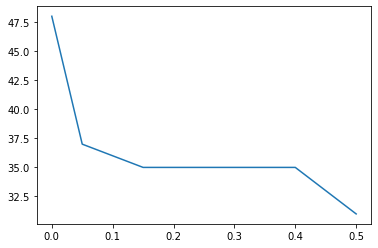

In [58]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
ds=read_csv('Datasets\oil-spill.csv', header=None)
# divide into inputs and outputs
df=ds.values
x=df[:, :-1]
y=df[:, -1]
print (x.shape, y.shape)

thresholds=arange(0.0,0.55, 0.05)
# apply transform with each thresholds
results=list()
for t in thresholds:
    transform= VarianceThreshold(threshold=t)
    x_sel=transform.fit_transform(x)
    # the no.of inputs columns is 
    n_features=x_sel.shape[1]
    print(t, n_features)
    # store the results
    results.append(n_features)
    
# plot the threshold vs no. of selected features
pyplot.plot(thresholds, results)
pyplot.show()


# identify the rows which contain duplicate data 

In [60]:
from pandas import read_csv
ds=read_csv('Datasets\IRIS.csv', header=None)
duplis=ds.duplicated()
print(duplis.any())
print(ds[duplis])

True
       0    1    2    3               4
35   4.9  3.1  1.5  0.1     Iris-setosa
38   4.9  3.1  1.5  0.1     Iris-setosa
143  5.8  2.7  5.1  1.9  Iris-virginica


# delete the rows which contain duplicate data

In [62]:
from pandas import read_csv
ds=read_csv('Datasets\IRIS.csv', header=None)
print(ds.shape)
ds.drop_duplicates(inplace=True)
print(ds.shape)

(151, 5)
(148, 5)
